In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Not book used to define and measure the sidecurb. Ultimately populate a drawing

In [2]:
colsname = ['x', 'y', 'z', 'xn', 'yn', 'zn', 'R', 'G', 'B', 'A', 'quality', 'zz']
lidar = pd.read_csv('../data/20180911_SHCCurb3.ply',
                    delimiter=' ',
                    skiprows=18,
                    #nrows=500000, #use None to read the complete dataset or the number of first rows to read
                    header=None,
                    #error_bad_lines=False,
                    #keep_default_na=False,
                    #dtype={0:'float', 1:'float', 2:'float', 3:'float', 4:'int', 5:'int', 6:'int'},
                    #skipfooter=20, engine='python',
                    #
                    )
lidar.columns=colsname
lidar.drop(['zz'], inplace=True, axis=1)
lidar.head()

,x,y,z,xn,yn,zn,R,G,B,A,quality
0,6.531357,-6.797287,-2.386337,0.035693,-0.037846,0.998646,121,142,104,255,0.193973
1,6.504440,-6.783005,-2.385269,0.044266,-0.033033,0.998474,87,106,78,255,0.188113
2,6.539658,-6.819748,-2.388138,0.050499,-0.032237,0.998204,130,147,110,255,0.190311
3,6.489365,-6.780930,-2.385605,0.051617,-0.021600,0.998433,92,113,81,255,0.195926
4,6.523087,-6.816177,-2.387894,0.046914,-0.039101,0.998133,114,133,97,255,0.185672


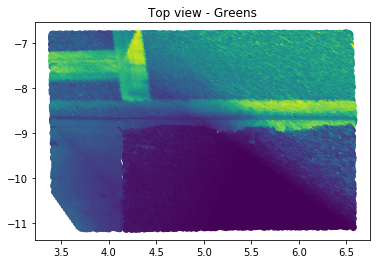

In [8]:
# Top view - Greens
fig = plt.figure() #figsize=(20,12)
plt.scatter(x=lidar.x, y=lidar.y, c=lidar.G)
plt.title('Top view - Greens')
plt.show()

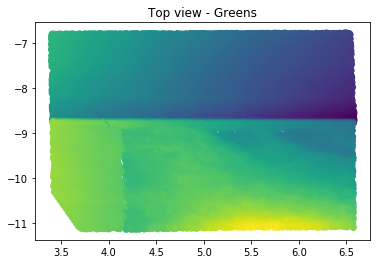

In [22]:
# Top view - Greens
fig = plt.figure() #figsize=(20,12)
plt.scatter(x=lidar.x, y=lidar.y, c=lidar.z)
plt.title('Top view - Greens')
plt.show()

# Elevation correction

In [15]:
# Slope calculation
dataset = lidar[lidar['y']>-7]
offset = (dataset.z.max() - dataset.z.min())
offset

0.17364500000000005

In [17]:
from sklearn.linear_model import LinearRegression
slopereg = LinearRegression()
slopereg.fit(X=dataset.x.values.reshape(-1,1), y=dataset.z.values.reshape(-1,1))
lidar['z_corr'] = lidar.z - slopereg.predict(lidar.x.values.reshape(-1,1)).reshape(-1)

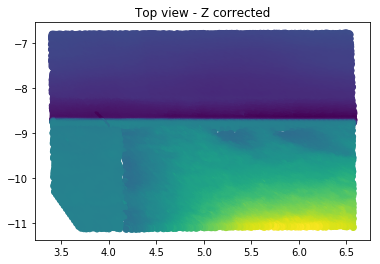

In [23]:
# Top view - Greens
fig = plt.figure() #figsize=(20,12)
plt.scatter(x=lidar.x, y=lidar.y, c=lidar.z_corr)
plt.title('Top view - Z corrected')
plt.show()

# Dataset limited to the sidecurb

In [19]:
sidecurb = lidar[lidar['y']>-9.2]
sidecurb = sidecurb[sidecurb['y']<-8]
sidecurb.shape

(9853, 12)

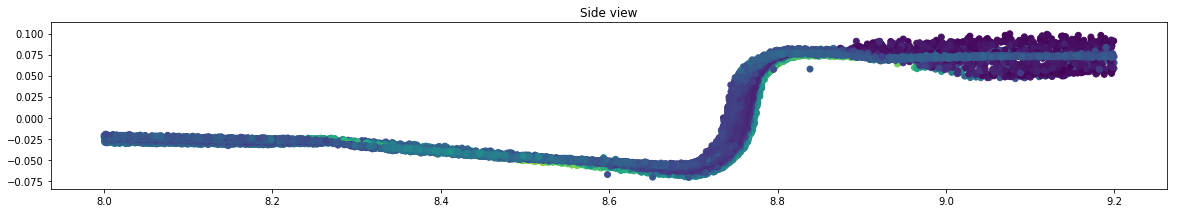

In [35]:
# Side view - elevation
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)#
plt.scatter(y=sidecurb.z_corr, x=-sidecurb.y, c=sidecurb.G)
plt.title('Side view')
ax.set_aspect('equal')
plt.show()

# random forrest on the curb - Complete set

In [111]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, n_estimators=10, n_jobs=-2)


In [112]:
X=np.array(sidecurb.y).reshape(-1,1)
y=np.array(sidecurb.z_corr).reshape(-1)

In [113]:
regr.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [114]:
Xpred=np.linspace(sidecurb.y.min(), sidecurb.y.max(), 500).reshape(-1,1)
ypred = regr.predict(Xpred)

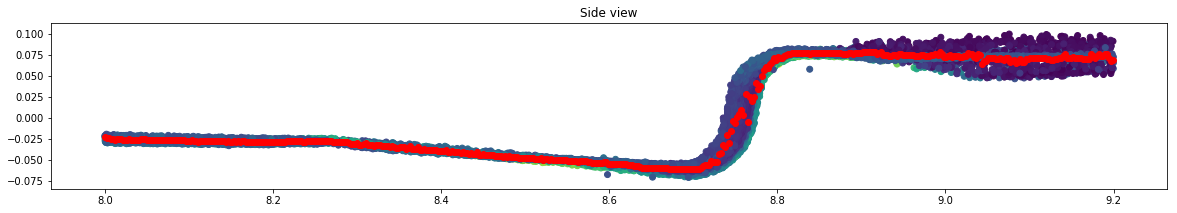

In [115]:
# Side view - elevation
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)#
plt.scatter(y=sidecurb.z_corr, x=-sidecurb.y, c=sidecurb.G)
plt.scatter(x=-Xpred.reshape(-1), y=ypred, c='r')
plt.title('Side view')
ax.set_aspect('equal')
plt.show()

# random forrest on the curb - 5cm section
 WARNING, there is some kind of cheating with the normal !!!

In [121]:
Xsectioncenter = 3.75
bandwith=.05

curbsection = sidecurb[sidecurb['x']>Xsectioncenter-bandwith]
curbsection = curbsection[curbsection['x']<Xsectioncenter+bandwith]
curbsection.shape

(347, 12)

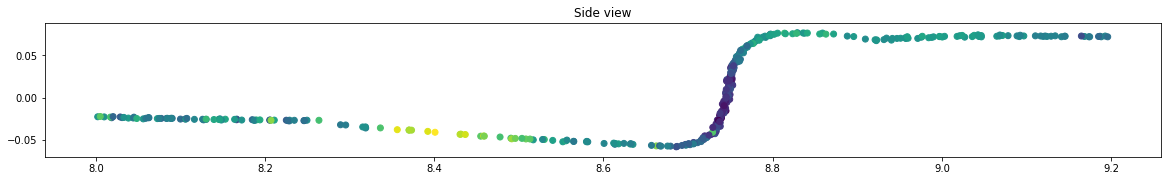

In [122]:
# Side view - elevation
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)#
plt.scatter(y=curbsection.z_corr, x=-curbsection.y, c=curbsection.G)
plt.title('Side view')
ax.set_aspect('equal')
plt.show()

In [135]:
regrsection = RandomForestRegressor(max_depth=None, n_estimators=100, n_jobs=-2)

In [145]:
X=np.array(curbsection[['y', 'zn']]).reshape(-1,2)
y=np.array(curbsection.z_corr).reshape(-1)

In [146]:
regrsection.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

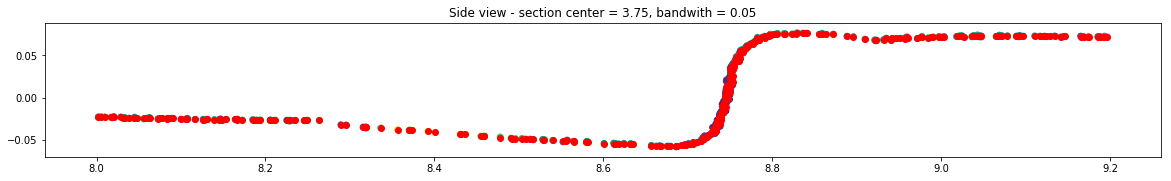

In [161]:
# Side view - elevation
Xpred=np.linspace(curbsection.y.min(), curbsection.y.max(), 500).reshape(-1,2)
ypred = regrsection.predict(X)
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)#
plt.scatter(y=curbsection.z_corr, x=-curbsection.y, c=curbsection.G)
plt.scatter(x=-X[:,0].reshape(-1), y=ypred, c='r')
plt.title('Side view - section center = {}, bandwith = {}'.format(Xsectioncenter, bandwith))
ax.set_aspect('equal')
plt.show()